http://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import folium # map rendering library
from folium.features import DivIcon
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("real_estate_valuation_data_set.csv")

In [3]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.shape

(414, 8)

In [5]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [6]:
features = df.drop(['No', 'Y house price of unit area'], axis=1)
features.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [7]:
target = df['Y house price of unit area']
target.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

(array([58., 43., 49., 97., 44., 10., 27., 50., 25., 11.]),
 array([ 0.  ,  4.38,  8.76, 13.14, 17.52, 21.9 , 26.28, 30.66, 35.04,
        39.42, 43.8 ]),
 <a list of 10 Patch objects>)

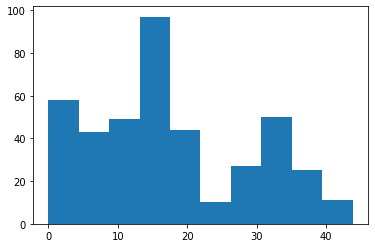

In [8]:
#plt.plot(df['X2 house age'])
plt.hist(df['X2 house age'])

(array([251.,  42.,  47.,  30.,   7.,   3.,  27.,   2.,   2.,   3.]),
 array([  23.38284 ,  669.846656, 1316.310472, 1962.774288, 2609.238104,
        3255.70192 , 3902.165736, 4548.629552, 5195.093368, 5841.557184,
        6488.021   ]),
 <a list of 10 Patch objects>)

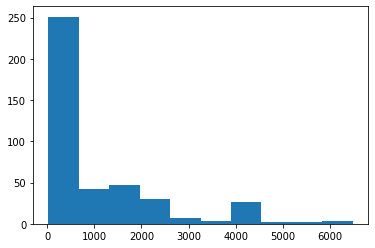

In [9]:
#plt.plot(df['X3 distance to the nearest MRT station'])
plt.hist(df['X3 distance to the nearest MRT station'])

(array([67., 46., 24., 46., 31., 67., 37., 31., 30., 35.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

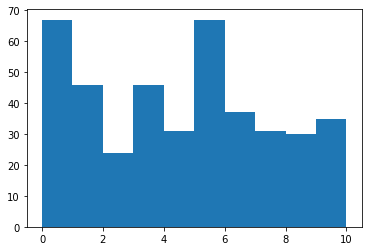

In [10]:
plt.hist(df['X4 number of convenience stores'])

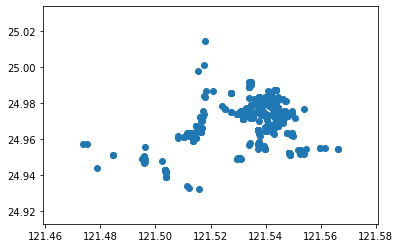

In [11]:
plt.scatter(df['X6 longitude'], df['X5 latitude'])

In [12]:
address = 'Taipei, Taiwan'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

The geograpical coordinate of Taipei, Taiwan are 25.0375198, 121.5636796.


In [13]:
# create map and display it
map = folium.Map(location=[latitude, longitude], zoom_start=8)
for i in range(len(df)):
    folium.Marker([df.iloc[i]['X5 latitude'],
                   df.iloc[i]['X6 longitude']]).add_to(map)

map

In [14]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state=0)

In [15]:
# Standardize features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(x_train)

# Create linear regression
regression = LinearRegression()
# Fit the linear regression
model = regression.fit(x_train, y_train)

In [16]:
# View the intercept
print(model.intercept_)

# View the feature coefficients
print(model.coef_)

-14866.721828564763
[ 5.02037302e+00 -2.63132611e-01 -4.46345490e-03  1.09258054e+00
  2.25488903e+02 -6.80648392e+00]


In [17]:
y_hat = model.predict(x_test)
test_mse = mean_squared_error(y_test, y_hat)

# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat)
test_rmse = np.sqrt(test_mse)
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat)
print("the test MAE is: {}".format(test_mae))
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test, y_hat))

the test MAE is: 5.760226029973001
Mean absolute error: 5.76
Residual sum of squares (MSE): 59.52
R2-score: 0.66


In [18]:
for i in range(20):
    print("Actual: {}, Predicted: {}".format(target[i], model.predict(features)[i]))

Actual: 37.9, Predicted: 47.12216221846029
Actual: 42.2, Predicted: 47.73879851512538
Actual: 47.3, Predicted: 48.77907859380866
Actual: 54.8, Predicted: 48.362387632798345
Actual: 43.1, Predicted: 46.14863976493689
Actual: 32.1, Predicted: 31.136257450198173
Actual: 40.3, Predicted: 38.730470815737135
Actual: 46.7, Predicted: 46.84469330342108
Actual: 18.8, Predicted: 9.22731374061732
Actual: 22.1, Predicted: 34.75350150679333
Actual: 41.4, Predicted: 33.86023761767501
Actual: 58.1, Predicted: 52.8857256414467
Actual: 39.3, Predicted: 40.839647174758284
Actual: 23.8, Predicted: 26.984117846091976
Actual: 34.3, Predicted: 45.59685932056891
Actual: 50.5, Predicted: 38.37379620503816
Actual: 70.1, Predicted: 50.636189486869625
Actual: 37.4, Predicted: 37.38758670211246
Actual: 42.3, Predicted: 46.636551182233234
Actual: 47.7, Predicted: 47.44308679029564
